In [1]:
from ImportLeague import getLeague
from ImportData import getTeamData
from ImportData import getPlayerData
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pickle

In [2]:
# Import Data
myLeague = getLeague()
teamData_defense,teamData_offense = getTeamData()
playerData = getPlayerData(myLeague,teamData_defense,teamData_offense)


In [3]:
playerData['QB']

,Name,PlayerID,Week,Position Rank,Projected Points,Season Projected Points,Off YPG/OppDef YPG,Off PPG/OppDef PPG,Off PYPG/OppDef PYPG,Points
0,Ryan Tannehill,14876,5,18,18.57,293.42,0.942652,0.826389,0.739033,18.82
1,Kyler Murray,3917315,5,2,23.88,356.68,1.309842,1.372549,1.392579,22.62
2,Russell Wilson,14881,5,9,21.81,316.67,0.882812,1.040323,0.890231,22.56
3,Aaron Rodgers,8439,5,17,19.39,321.95,0.984520,1.265957,0.982571,24.12
4,Daniel Jones,3917792,5,6,19.69,259.63,0.968963,0.855967,0.895972,26.78
5,Tom Brady,2330,5,4,23.15,319.57,1.029616,1.117216,1.302187,11.06
6,Derek Carr,16757,5,11,17.82,258.89,1.161429,1.140351,1.369748,14.44
7,Justin Herbert,4038941,5,14,19.22,308.99,1.562125,1.416667,1.542437,21.28
8,Taylor Heinicke,2565969,5,15,16.48,42.77,0.979101,1.462428,0.842923,27.90
9,Matthew Stafford,12483,5,8,21.92,282.97,0.880315,1.152000,1.019829,19.30


In [4]:
# Data Save
pickle.dump([playerData,teamData_defense,teamData_offense], open('Data/Week_4.p', 'wb' ))
pickle.dump([myLeague.nfl_week,myLeague.teams,myLeague.free_agents(),myLeague._get_pro_schedule(myLeague.nfl_week)], open('Data/LeagueData_4.p', 'wb' ))

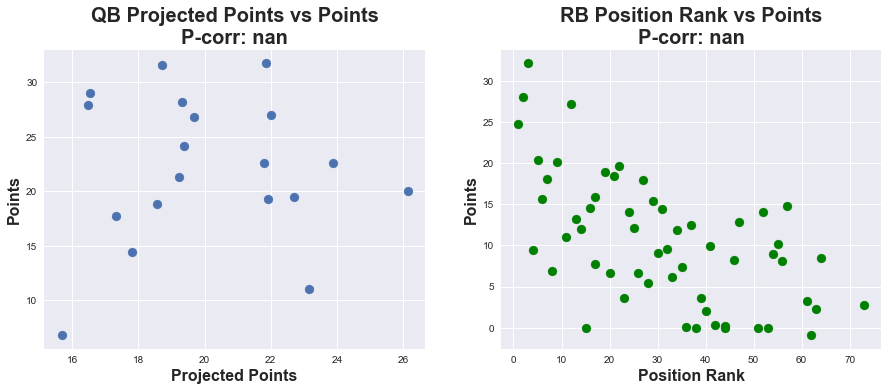

In [5]:
# list(PRO_TEAM_MAP.values()).index(player.proTeam)
# plt.scatter(playerData['QB']['Position Rank'],playerData['QB']['Points'])
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5.5), facecolor='w', edgecolor='k')

ax1.scatter(playerData['QB']['Projected Points'],playerData['QB']['Points'],s = 80)
proj_corr_QB = np.corrcoef(playerData['QB']['Projected Points'].to_numpy(dtype=float),playerData['QB']['Points'].to_numpy(dtype=float))[0][1]
ax1.grid(b=True) 
ax1.set_title('QB Projected Points vs Points\nP-corr: {:0.2f}'.format(proj_corr_QB),fontweight='bold',fontsize = 20)
ax1.set_xlabel('Projected Points',fontweight='bold',fontsize = 16)
ax1.set_ylabel(r'Points',fontweight='bold',fontsize = 16)

ax2.scatter(playerData['RB']['Position Rank'],playerData['RB']['Points'],c='g',s = 80)
posRank_corr_RB = np.corrcoef(playerData['RB']['Position Rank'].to_numpy(dtype=float),playerData['RB']['Points'].to_numpy(dtype=float))[0][1]
ax2.grid(b=True) 
ax2.set_title('RB Position Rank vs Points\nP-corr: {:0.2f}'.format(posRank_corr_RB),fontweight='bold',fontsize = 20)
ax2.set_xlabel('Position Rank',fontweight='bold',fontsize = 16)
ax2.set_ylabel(r'Points',fontweight='bold',fontsize = 16)

fig.savefig('Images/FRL_1.png',)

In [ ]:
df = playerData['D/ST'][['Position Rank','Projected Points','Season Projected Points']]
normalized_df=(df-df.min())/(df.max()-df.min()) 

regr = linear_model.LinearRegression()
regr.fit(normalized_df[['Position Rank','Projected Points','Season Projected Points']], playerData['D/ST'][['Points']])

print('Defense/Special Teams Regression coefficients: ', regr.coef_)
    

Defense/Special Teams Regression coefficients:  [[-6.85884022  2.79272909 -9.31509104]]
